In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
sub_data = pd.read_csv("submissions.csv")
comments_data = pd.read_csv("comments.csv")
sub_data.head(10)
comments_data.head(10)

,_id,created_utc,id,score,link_id,parent_id,body
0,ga1kt2a,1603624419,ga1kt2a,1,t3_jfmta6,t1_g9wltgq,I don’t see how it’s equivalent to what you sa...
1,g9wltgq,1603544941,g9wltgq,1,t3_jfmta6,t1_g9qwwy3,"In that case sure he wasn't lying, he was just..."
2,g9qwwy3,1603451114,g9qwwy3,1,t3_jfmta6,t1_g9qwv10,You can use the TraceTogether app. That’s not ...
3,g9qwv10,1603451063,g9qwv10,1,t3_jfmta6,t1_g9qqjzw,... And what is the difference? That TT is not...
4,g9qqjzw,1603444287,g9qqjzw,1,t3_jfmta6,t1_g9qoj7k,"It’s confirming what I’ve said, is it not? He ..."
5,g9qoj7k,1603441872,g9qoj7k,1,t3_jfmta6,t1_g9mqz5y,https://support.tracetogether.gov.sg/hc/en-sg/...
6,g9qi5qc,1603435060,g9qi5qc,1,t3_jfmta6,t1_g9p9p10,top up $100 to unlock Singpass/ voting and con...
7,g9p9p10,1603408080,g9p9p10,1,t3_jfmta6,t1_g9mfgee,"Only for $300!\n\n""Pay a fine to save a fine"""
8,g9p9mys,1603408047,g9p9mys,2,t3_jfmta6,t1_g9ltk1p,"Next election, show your displeasure. They pro..."
9,g9p994q,1603407832,g9p994q,1,t3_jfmta6,t1_g9m4puc,Just shove it into a USB stick and carry aroun...


In [3]:
sorted_comments = sub_data.sort_values(by=['num_comments'], ascending=False)
sorted_comments.head(10)

,_id,created_utc,id,num_comments,score,selftext,subreddit,title,url
7167,hie65n,1593483117,hie65n,1454,NaN,"Since no one wanna do, I shall start one. Plea...",NaN,GE2020: NOMINATION DAY MEGA THREAD,https://www.reddit.com/r/singapore/comments/hi...
7166,fu4ch0,1585901081,fu4ch0,929,NaN,I will update this post as more things are add...,NaN,PM Lee announces new stricter restrictions to ...,https://www.reddit.com/r/singapore/comments/fu...
7165,g5t1yk,1587522845,g5t1yk,889,NaN,It’s so upsetting to see fellow Singaporeans a...,NaN,Racism in Singapore,https://www.reddit.com/r/singapore/comments/g5...
7164,gb9u7i,1588300215,gb9u7i,762,NaN,I will start by saying that my heart goes all ...,NaN,Unpopular opinion: singaporeans should come fi...,https://www.reddit.com/r/singapore/comments/gb...
7163,hvu4x6,1595425902,hvu4x6,619,NaN,FALSE,NaN,Saw this on Facebook. So someone left a note t...,https://i.redd.it/mc9l1b1tyec51.jpg
7162,h9eb61,1592219805,h9eb61,576,NaN,FALSE,NaN,COVID-19: Phase 2 of reopening to start from J...,https://www.channelnewsasia.com/news/singapore...
7161,hwl2do,1595528870,hwl2do,532,NaN,I write this from a point of fear and exaspera...,NaN,My dad has been self-radicalising every night ...,https://www.reddit.com/r/singapore/comments/hw...
7160,il1z9v,1599029755,il1z9v,528,NaN,FALSE,NaN,[LIVE HD] PM Lee Hsien Loong speaks in Parliam...,https://youtu.be/sbi9NyO-1mU
7159,hmn6qy,1594093833,hmn6qy,505,NaN,I was planning to keep mum during this electio...,NaN,PAP's greatest fear and why you should vote fo...,https://www.reddit.com/r/singapore/comments/hm...
7158,hljtu8,1593941159,hljtu8,481,NaN,[**Click here for the full GE2020 broadcast sc...,NaN,[GE 2020] 5 July Constituency Political Broadc...,https://www.reddit.com/r/singapore/comments/hl...


In [4]:
comments = sub_data.num_comments
comments

0          0
1          0
2          0
3          0
4          0
        ... 
7163     619
7164     762
7165     889
7166     929
7167    1454
Name: num_comments, Length: 7168, dtype: int64

### Whisker Plot

C:\Users\jisa_\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  del sys.path[0]


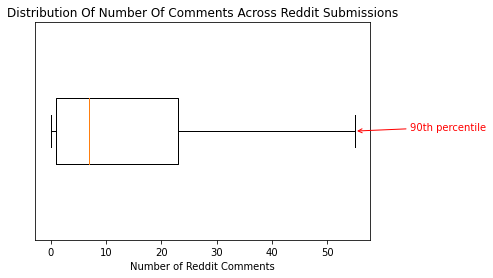

<Figure size 432x288 with 0 Axes>

In [5]:
plt.boxplot(comments, vert=False, showfliers=False, manage_ticks = True,whis = [0,90])
plt.ylim(0.75,1.25)
plt.yticks([], [])
plt.xlabel('Number of Reddit Comments')
plt.title("Distribution Of Number Of Comments Across Reddit Submissions")
plt.rcParams['figure.facecolor'] = 'white' #outer colour
plt.rcParams['axes.facecolor'] = 'white'


plt.annotate('90th percentile',xy = (55,1), xycoords='data',
             textcoords='offset points',
             color='red',
             arrowprops=dict(arrowstyle="->", color = 'red'))
plt.show()
plt.savefig("reddit_boxplot.png")

### Cumulative Graph

In [6]:
# submissions.sort(key=lambda submission: submission["num_comments"])
# submissions

In [7]:
x = list(range(len(sub_data)))
y = []
for i in x:
    y.append(sub_data["num_comments"][i])
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [8]:
cum_sum = 0
cum_y = []
for yi in y:
    cum_sum += yi
    cum_y.append(cum_sum)
cum_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Text(6350, 41000, 'Top 85% of comments come\nfrom top 30% of submissions')

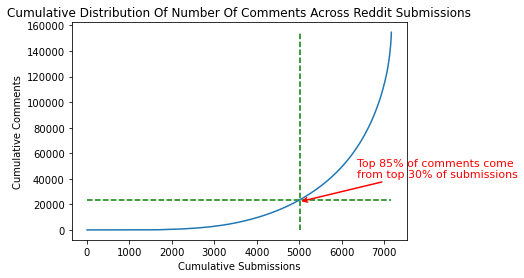

In [9]:
import matplotlib.pyplot as plt

# stats = linregress(x,y)
# # TODO calculate linear regression 

# m = stats.slope
# b = stats.intercept
# plt.plot(x,m*x+b, color='red')

x_percent = 0.3
i = int(len(x) * (1 - x_percent))
y_percent = (1 - cum_y[i] / cum_y[-1])

plt.plot(x, cum_y)
plt.vlines(x=x[i], ymin=0, ymax=max(cum_y), color = 'green', linestyle='dashed', zorder=2)
plt.hlines(y=cum_y[i], xmin=0, xmax=len(x), color = 'green', linestyle='dashed', zorder=2)
plt.xlabel('Cumulative Submissions')
plt.ylabel('Cumulative Comments')
plt.title("Cumulative Distribution Of Number Of Comments Across Reddit Submissions")

plt.rcParams['figure.facecolor'] = 'white' #outer colour
plt.rcParams['axes.facecolor'] = 'white'

plt.annotate('Top {:.0f}% of comments come' '\n' 'from top {:.0f}% of submissions'.format(100*y_percent, 100*x_percent),
             xy = (5000,22000),
             xytext=(6350, 41000),
             color='red',
             fontsize = 11,
             arrowprops=dict(arrowstyle="->", color = 'red', lw=1.5))


### Whisker plot for comments length

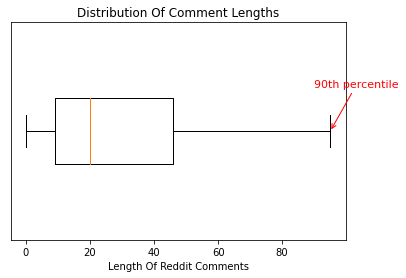

In [10]:
VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=VOCAB_SIZE)

#tokenizing comments
tokenizer.fit_on_texts(comments_data["body"])
comment_sequences = tokenizer.texts_to_sequences(comments_data["body"])

comments_length = []
x1 = list(range(len(comments_data)))
for i in x1:
    comments_length.append(len(comment_sequences[i]))


plt.boxplot(comments_length, vert=False, showfliers=False, manage_ticks = True,whis = [0,90])
plt.ylim(0.75,1.25)
plt.yticks([], [])
plt.xlabel('Length Of Reddit Comments')
plt.title("Distribution Of Comment Lengths")
plt.rcParams['figure.facecolor'] = 'white' #outer colour
plt.rcParams['axes.facecolor'] = 'white'


plt.annotate('90th percentile',xy = (95,1),
             xytext=(90, 1.1),
             color='red',
             fontsize=11,
             arrowprops=dict(arrowstyle="->", color = 'red'))
plt.show()

### whisker plot for submission lengths

C:\Users\jisa_\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


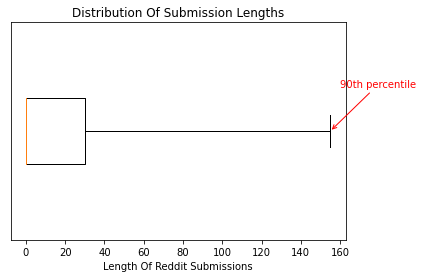

In [11]:
#tokenizing submissions
for i in range(len(sub_data["selftext"])):
    if sub_data["selftext"][i] in ("FALSE", "[removed]") or not isinstance(sub_data["selftext"][i], str):
        sub_data["selftext"][i] = ""

tokenizer.fit_on_texts(sub_data["selftext"])
sub_sequences = tokenizer.texts_to_sequences(sub_data["selftext"])

sub_length = []
x2 = list(range(len(sub_data)))
for i in x2:
    sub_length.append(len(sub_sequences[i]))
    
plt.boxplot(sub_length, vert=False, showfliers=False, manage_ticks = True,whis = [0,90])
plt.ylim(0.75,1.25)
plt.yticks([], [])
plt.xlabel('Length Of Reddit Submissions')
plt.title("Distribution Of Submission Lengths")
plt.rcParams['figure.facecolor'] = 'white' #outer colour
plt.rcParams['axes.facecolor'] = 'white'


plt.annotate('90th percentile',xy = (155,1), 
             xytext=(160, 1.1),
             color='red',
             arrowprops=dict(arrowstyle="->", color = 'red'))
plt.show()

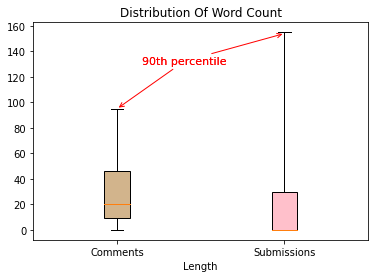

In [12]:
df = pd.Series({"lengths": comments_length})
df2 = pd.Series({"lengths":sub_length})

box = plt.boxplot([df.lengths, df2.lengths],showfliers=False, vert = True, manage_ticks = True,whis = [0,90],patch_artist=True)
plt.xticks([1,2],('Comments', 'Submissions'))

colors = ['tan', 'pink']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# plt.ylim(0.75,1.25)
# plt.yticks([], [])
plt.xlabel('Length')
plt.title("Distribution Of Word Count")
plt.rcParams['figure.facecolor'] = 'white' #outer colour
plt.rcParams['axes.facecolor'] = 'white'

plt.annotate('90th percentile',xy = (1,95), 
             xytext=(1.15, 130),
             fontsize = 11,
             color='red',
             arrowprops=dict(arrowstyle="->", color = 'red'))

plt.annotate('90th percentile',xy = (2,154), 
             xytext=(1.15, 130),
             fontsize=11,
             color='red',
             arrowprops=dict(arrowstyle="->", color = 'red'))
            

plt.show()


